<a href="https://colab.research.google.com/github/ThierrryScotto/classify-reuters-newswires/blob/main/classify_Reuters_newswires.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import imdb

# Getting the dataset

In [2]:
from tensorflow.keras.datasets import reuters

In [3]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2110848/2110848 [==============================] - 0s 0us/step


In [4]:
print(train_data)

[list([1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12])
 list([1, 3267, 699, 3434, 2295, 56, 2, 7511, 9, 56, 3906, 1073, 81, 5, 1198, 57, 366, 737, 132, 20, 4093, 7, 2, 49, 2295, 2, 1037, 3267, 699, 3434, 8, 7, 10, 241, 16, 855, 129, 231, 783, 5, 4, 587, 2295, 2, 2, 775, 7, 48, 34, 191, 44, 35, 1795, 505, 17, 12])
 list([1, 53, 12, 284, 15, 14, 272, 26, 53, 959, 32, 818, 15, 14, 272, 26, 39, 684, 70, 11, 14, 12, 3886, 18, 180, 183, 187, 70, 11, 14, 102, 32, 11, 29, 53, 44, 704, 15, 14, 19, 758, 15, 53, 959, 47, 1013, 15, 14, 19, 132, 15, 39, 965, 32, 11, 14, 147, 72, 11, 180, 183, 187, 44, 11, 14, 102, 19, 11, 123, 186, 90, 67, 960, 4, 78, 13, 68, 467, 511, 110, 59, 89, 90, 67, 139

In [5]:
print(train_data[10])

[1, 245, 273, 207, 156, 53, 74, 160, 26, 14, 46, 296, 26, 39, 74, 2979, 3554, 14, 46, 4689, 4329, 86, 61, 3499, 4795, 14, 61, 451, 4329, 17, 12]


In [6]:
print(train_labels)

[ 3  4  3 ... 25  3 25]


In [7]:
print("train size: ", len(train_data))
print("test size: ", len(test_data))

train size:  8982
test size:  2246


## Decodeding one of newswires back to English words

In [8]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join(reverse_word_index.get(i - 3, "?") for i in train_data[10])

550378/550378 [==============================] - 0s 0us/step


In [9]:
print("Code newswire: ", train_data[10])
print("Decoded newswire: ", decoded_newswire)

Code newswire:  [1, 245, 273, 207, 156, 53, 74, 160, 26, 14, 46, 296, 26, 39, 74, 2979, 3554, 14, 46, 4689, 4329, 86, 61, 3499, 4795, 14, 61, 451, 4329, 17, 12]
Decoded newswire:  ? period ended december 31 shr profit 11 cts vs loss 24 cts net profit 224 271 vs loss 511 349 revs 7 258 688 vs 7 200 349 reuter 3


In [10]:
print("Aswer: ", train_labels[10])

Aswer:  3


# Preparing the data

In [11]:
def vectorize_sequences(sequences, dimension = 10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    for j in sequence:
      results[i, j] = 1.
  return results

In [12]:
train_data.shape

(8982,)

In [13]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [14]:
print(x_train)

[[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 ...
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]]


## Encoding the labels

In [15]:
def to_one_hot(labels, dimension = 46):
    results = np.zeros((len(labels), dimension))

    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

In [16]:
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [17]:
print(y_train[0])

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [18]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [19]:
print(y_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


# Building the model

In [20]:
model = keras.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(46, activation='softmax')
])

In [21]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [22]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = y_train[:1000]
partial_y_train = y_train[1000:]

## Trainig the model

In [23]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 45ms/step - loss: 2.7671 - accuracy: 0.5084 - val_loss: 1.8830 - val_accuracy: 0.6050
Epoch 2/20
16/16 [==============================] - 0s 31ms/step - loss: 1.5911 - accuracy: 0.6708 - val_loss: 1.3842 - val_accuracy: 0.6860
Epoch 3/20
16/16 [==============================] - 0s 30ms/step - loss: 1.2004 - accuracy: 0.7393 - val_loss: 1.1868 - val_accuracy: 0.7270
Epoch 4/20
16/16 [==============================] - 0s 31ms/step - loss: 0.9763 - accuracy: 0.7866 - val_loss: 1.0686 - val_accuracy: 0.7780
Epoch 5/20
16/16 [==============================] - 1s 35ms/step - loss: 0.8137 - accuracy: 0.8185 - val_loss: 0.9925 - val_accuracy: 0.7880
Epoch 6/20
16/16 [==============================] - 1s 53ms/step - loss: 0.6817 - accuracy: 0.8510 - val_loss: 0.9587 - val_accuracy: 0.7900
Epoch 7/20
16/16 [==============================] - 1s 49ms/step - loss: 0.5765 - accuracy: 0.8728 - val_loss: 0.9205 - val_accuracy: 0.7960
Epoch 8/20
16

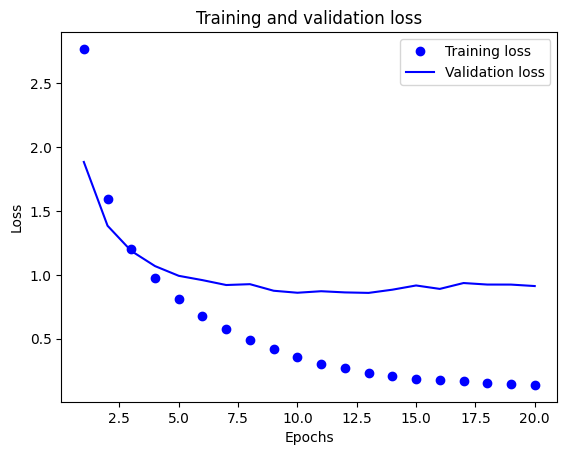

In [24]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

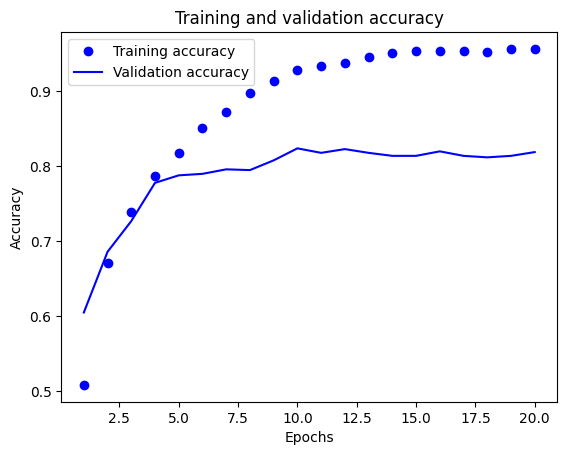

In [25]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Training the model with less epochs

In [26]:
model = keras.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(46, activation='softmax')
])

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)

results = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 [==============================] - 1s 27ms/step - loss: 2.5944 - accuracy: 0.5276
Epoch 2/9
18/18 [==============================] - 1s 28ms/step - loss: 1.4413 - accuracy: 0.6921
Epoch 3/9
18/18 [==============================] - 0s 27ms/step - loss: 1.1315 - accuracy: 0.7530
Epoch 4/9
18/18 [==============================] - 1s 28ms/step - loss: 0.9233 - accuracy: 0.7987
Epoch 5/9
18/18 [==============================] - 1s 34ms/step - loss: 0.7679 - accuracy: 0.8317
Epoch 6/9
18/18 [==============================] - 0s 27ms/step - loss: 0.6417 - accuracy: 0.8594
Epoch 7/9
18/18 [==============================] - 0s 27ms/step - loss: 0.5425 - accuracy: 0.8848
Epoch 8/9
18/18 [==============================] - 0s 27ms/step - loss: 0.4529 - accuracy: 0.9010
Epoch 9/9
71/71 [==============================] - 0s 3ms/step - loss: 0.9300 - accuracy: 0.7903


In [27]:
results

[0.9299572706222534, 0.7902938723564148]

In [28]:
import copy

test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

0.1861086375779163

In [29]:
len(test_labels_copy)

2246

In [30]:
hits_array

array([False, False,  True, ..., False, False, False])

## Generating predictions on new data

In [31]:
predictions = model.predict(x_test)

71/71 [==============================] - 0s 2ms/step


In [33]:
print(predictions)

[[1.1846779e-05 1.3131572e-05 3.5326113e-05 ... 1.5424919e-05
  3.5759076e-06 1.1796558e-06]
 [7.1958192e-03 1.8604549e-02 1.3457124e-02 ... 7.9904494e-05
  2.8737511e-05 5.0286012e-04]
 [5.3055650e-03 8.6954069e-01 8.3916979e-03 ... 2.0306409e-04
  2.2893050e-04 1.1740685e-03]
 ...
 [3.4047862e-05 2.0199874e-05 5.2597741e-05 ... 3.0807500e-05
  4.4559798e-05 3.1447078e-05]
 [2.1717136e-03 1.0536794e-02 3.9534913e-03 ... 5.2033097e-04
  5.8449130e-04 2.0261960e-04]
 [1.4194866e-03 1.0743394e-01 3.0154513e-02 ... 1.9214849e-03
  1.1579912e-03 4.0215161e-03]]


In [35]:
print(predictions[0].shape)

(46,)


In [36]:
np.sum(predictions[0])

0.9999998

In [37]:
# The largest entry is the predicted class
np.argmax(predictions[0])

3

# A different way to handle the labels and the loss

In [38]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [40]:
train_labels

array([ 3,  4,  3, ..., 25,  3, 25])

In [42]:
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [43]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(46, activation="softmax")
])

model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 1s 15ms/step - loss: 2.6879 - accuracy: 0.2944 - val_loss: 2.0190 - val_accuracy: 0.5640
Epoch 2/20
63/63 [==============================] - 1s 10ms/step - loss: 1.7651 - accuracy: 0.6144 - val_loss: 1.5583 - val_accuracy: 0.6190
Epoch 3/20
63/63 [==============================] - 1s 10ms/step - loss: 1.4088 - accuracy: 0.6507 - val_loss: 1.4094 - val_accuracy: 0.6520
Epoch 4/20
63/63 [==============================] - 1s 11ms/step - loss: 1.2306 - accuracy: 0.6837 - val_loss: 1.3440 - val_accuracy: 0.6660
Epoch 5/20
63/63 [==============================] - 1s 11ms/step - loss: 1.1033 - accuracy: 0.7053 - val_loss: 1.2872 - val_accuracy: 0.6670
Epoch 6/20
63/63 [==============================] - 1s 10ms/step - loss: 1.0018 - accuracy: 0.7256 - val_loss: 1.2635 - val_accuracy: 0.6760
Epoch 7/20
63/63 [==============================] - 1s 10ms/step - loss: 0.9153 - accuracy: 0.7523 - val_loss: 1.2513 - val_accuracy: 0.6900
Epoch 8/20
63